<a href="https://colab.research.google.com/github/alphacoderone/Knee-Joint-Classifier/blob/main/Project_Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install EMD-signal
# The PyEMD module is actually called EMD-signal.
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
# Once the EMD-signal package is installed, you should be able to import the EMD class from PyEMD.
from scipy.io import loadmat
import pandas as pd

In [ ]:
normal = []
for i in range (51):
  a = loadmat(f'/content/novag{i+1}.mat')
  normal.append(a)

abnormal = []
for i in range (38):
  a = loadmat(f'/content/abvag{i+1}.mat')
  abnormal.append(a)

In [ ]:
emd = EMD()

normalimfs = []
normaln_imfs = []
for i in range(51):
  signal = normal[i]['data'].flatten()
  imf = emd(signal)
  imf_subset = imf[:6]
  normalimfs.append(imf_subset)
  normaln_imf=normalimfs[i].shape[0]
  normaln_imfs.append(normaln_imf)

imfs = []
n_imfs= []
for i in range(38):
  signal = abnormal[i]['data'].flatten()
  imf=emd(signal)
  imf_subset = imf[:6]
  imfs.append(imf_subset)
  n_imf=imfs[i].shape[0]
  n_imfs.append(n_imf)


In [ ]:
# without any key - value pairs extracting time features
from scipy.stats import skew, kurtosis

# Function to extract time-domain features from a single IMF
def extract_time_features(imf):
    # Mean
    mean_val = np.mean(imf)

    # Variance
    variance_val = np.var(imf)

    # Skewness
    skewness_val = skew(imf)

    # Kurtosis
    kurtosis_val = kurtosis(imf)

    # Energy (sum of squared values)
    energy_val = np.sum(imf ** 2)

    # Entropy (using Shannon's entropy)
    hist, bin_edges = np.histogram(imf, bins=10, density=True)
    entropy_val = -np.sum(hist * np.log(hist + 1e-9))  # Adding a small value to avoid log(0)

    # Return values as a list
    return [mean_val, variance_val, skewness_val, kurtosis_val, energy_val, entropy_val]


In [ ]:
# without any key - value pairs extracting frequency features
from scipy.signal import welch
import numpy as np

# Function to extract frequency-domain features from a single IMF
def extract_frequency_features(imf, fs=2000):
    # Power Spectral Density (PSD)
    freqs, psd = welch(imf, fs=fs)

    # Dominant frequency (frequency with the highest power)
    dominant_freq_val = freqs[np.argmax(psd)]

    # Total power in the signal
    total_power_val = np.sum(psd)

    # Return values as a list
    return [dominant_freq_val, total_power_val]

In [ ]:
# Function to extract all features from all IMFs of a signal
def extract_features_from_signal(imfs, fs=2000):
    signal_features = []

    for imf in imfs:
        # Extract time-domain features (list of values)
        time_features = extract_time_features(imf)

        # Extract frequency-domain features (list of values)
        freq_features = extract_frequency_features(imf, fs)

        # Combine both feature sets into a single list
        combined_features = time_features + freq_features

        # Append to list of features for this signal
        signal_features.append(combined_features)

    return signal_features


In [ ]:
# Extract features for all abnormal and normal signals
normal_features = []
for imf in normalimfs:
    features = extract_features_from_signal(imf)
    normal_features.append(features)

abnormal_features = []
for imf in imfs:
    features = extract_features_from_signal(imf)
    abnormal_features.append(features)


In [ ]:
mean1 = []
variance1 = []
skewness1 = []
kurtosis1 = []
energy1 = []
entropy1 = []
dominant_freq1 = []
total_power1 = []

for nf in normal_features:
  n = nf[0]
  mean1.append(n[0]);
  variance1.append(n[1]);
  skewness1.append(n[2]);
  kurtosis1.append(n[3]);
  energy1.append(n[4]);
  entropy1.append(n[5]);
  dominant_freq1.append(n[6]);
  total_power1.append(n[7]);

for af in abnormal_features:
  a = af[0]
  mean1.append(a[0]);
  variance1.append(a[1]);
  skewness1.append(a[2]);
  kurtosis1.append(a[3]);
  energy1.append(a[4]);
  entropy1.append(a[5]);
  dominant_freq1.append(a[6]);
  total_power1.append(a[7]);


In [ ]:
import pandas as pd

# Create a sample DataFrame
data1 = {
    'Mean': mean1,
    'Variance': variance1,
    'Skewness': skewness1,
    'Kurtosis': kurtosis1,
    'Energy': energy1,
    'Entropy': entropy1,
    'Dominant Frequency': dominant_freq1,
    'Total Power': total_power1
}

df = pd.DataFrame(data1)

# Export to Excel
df.to_excel('IMF1.xlsx', index=False)

In [ ]:
mean2 = []
variance2 = []
skewness2 = []
kurtosis2 = []
energy2 = []
entropy2 = []
dominant_freq2 = []
total_power2 = []

for nf in normal_features:
    n = nf[1]
    mean2.append(n[0])
    variance2.append(n[1])
    skewness2.append(n[2])
    kurtosis2.append(n[3])
    energy2.append(n[4])
    entropy2.append(n[5])
    dominant_freq2.append(n[6])
    total_power2.append(n[7])

for af in abnormal_features:
    a = af[1]
    mean2.append(a[0])
    variance2.append(a[1])
    skewness2.append(a[2])
    kurtosis2.append(a[3])
    energy2.append(a[4])
    entropy2.append(a[5])
    dominant_freq2.append(a[6])
    total_power2.append(a[7])


In [ ]:
import pandas as pd

# Create a sample DataFrame
data2 = {
    'Mean': mean2,
    'Variance': variance2,
    'Skewness': skewness2,
    'Kurtosis': kurtosis2,
    'Energy': energy2,
    'Entropy': entropy2,
    'Dominant Frequency': dominant_freq2,
    'Total Power': total_power2
}

df = pd.DataFrame(data2)

# Export to Excel
df.to_excel('IMF2.xlsx', index=False)

In [ ]:
mean3 = []
variance3 = []
skewness3 = []
kurtosis3 = []
energy3 = []
entropy3 = []
dominant_freq3 = []
total_power3 = []

for nf in normal_features:
    n = nf[2]
    mean3.append(n[0])
    variance3.append(n[1])
    skewness3.append(n[2])
    kurtosis3.append(n[3])
    energy3.append(n[4])
    entropy3.append(n[5])
    dominant_freq3.append(n[6])
    total_power3.append(n[7])

for af in abnormal_features:
    a = af[2]
    mean3.append(a[0])
    variance3.append(a[1])
    skewness3.append(a[2])
    kurtosis3.append(a[3])
    energy3.append(a[4])
    entropy3.append(a[5])
    dominant_freq3.append(a[6])
    total_power3.append(a[7])


In [ ]:
import pandas as pd

# Create a sample DataFrame
data3 = {
    'Mean': mean3,
    'Variance': variance3,
    'Skewness': skewness3,
    'Kurtosis': kurtosis3,
    'Energy': energy3,
    'Entropy': entropy3,
    'Dominant Frequency': dominant_freq3,
    'Total Power': total_power3
}

df = pd.DataFrame(data3)

# Export to Excel
df.to_excel('IMF3.xlsx', index=False)

In [ ]:
mean4 = []
variance4 = []
skewness4 = []
kurtosis4 = []
energy4 = []
entropy4 = []
dominant_freq4 = []
total_power4 = []

for nf in normal_features:
    n = nf[3]
    mean4.append(n[0])
    variance4.append(n[1])
    skewness4.append(n[2])
    kurtosis4.append(n[3])
    energy4.append(n[4])
    entropy4.append(n[5])
    dominant_freq4.append(n[6])
    total_power4.append(n[7])

for af in abnormal_features:
    a = af[3]
    mean4.append(a[0])
    variance4.append(a[1])
    skewness4.append(a[2])
    kurtosis4.append(a[3])
    energy4.append(a[4])
    entropy4.append(a[5])
    dominant_freq4.append(a[6])
    total_power4.append(a[7])


In [ ]:
import pandas as pd

# Create a sample DataFrame
data4 = {
    'Mean': mean4,
    'Variance': variance4,
    'Skewness': skewness4,
    'Kurtosis': kurtosis4,
    'Energy': energy4,
    'Entropy': entropy4,
    'Dominant Frequency': dominant_freq4,
    'Total Power': total_power4
}

df = pd.DataFrame(data4)

# Export to Excel
df.to_excel('IMF4.xlsx', index=False)

In [ ]:
mean5 = []
variance5 = []
skewness5 = []
kurtosis5 = []
energy5 = []
entropy5 = []
dominant_freq5 = []
total_power5 = []

for nf in normal_features:
    n = nf[4]
    mean5.append(n[0])
    variance5.append(n[1])
    skewness5.append(n[2])
    kurtosis5.append(n[3])
    energy5.append(n[4])
    entropy5.append(n[5])
    dominant_freq5.append(n[6])
    total_power5.append(n[7])

for af in abnormal_features:
    a = af[4]
    mean5.append(a[0])
    variance5.append(a[1])
    skewness5.append(a[2])
    kurtosis5.append(a[3])
    energy5.append(a[4])
    entropy5.append(a[5])
    dominant_freq5.append(a[6])
    total_power5.append(a[7])


In [ ]:
import pandas as pd

# Create a sample DataFrame
data5 = {
    'Mean': mean5,
    'Variance': variance5,
    'Skewness': skewness5,
    'Kurtosis': kurtosis5,
    'Energy': energy5,
    'Entropy': entropy5,
    'Dominant Frequency': dominant_freq5,
    'Total Power': total_power5
}

df = pd.DataFrame(data5)

# Export to Excel
df.to_excel('IMF5.xlsx', index=False)

In [ ]:
mean6 = []
variance6 = []
skewness6 = []
kurtosis6 = []
energy6 = []
entropy6 = []
dominant_freq6 = []
total_power6 = []

for nf in normal_features:
    n = nf[5]
    mean6.append(n[0])
    variance6.append(n[1])
    skewness6.append(n[2])
    kurtosis6.append(n[3])
    energy6.append(n[4])
    entropy6.append(n[5])
    dominant_freq6.append(n[6])
    total_power6.append(n[7])

for af in abnormal_features:
    a = af[5]
    mean6.append(a[0])
    variance6.append(a[1])
    skewness6.append(a[2])
    kurtosis6.append(a[3])
    energy6.append(a[4])
    entropy6.append(a[5])
    dominant_freq6.append(a[6])
    total_power6.append(a[7])



In [ ]:
import pandas as pd

# Create a sample DataFrame
data6 = {
    'Mean': mean6,
    'Variance': variance6,
    'Skewness': skewness6,
    'Kurtosis': kurtosis6,
    'Energy': energy6,
    'Entropy': entropy6,
    'Dominant Frequency': dominant_freq6,
    'Total Power': total_power6
}

df = pd.DataFrame(data6)

# Export to Excel
df.to_excel('IMF6.xlsx', index=False)

Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.86      1.00      0.92        12

    accuracy                           0.89        18
   macro avg       0.93      0.83      0.86        18
weighted avg       0.90      0.89      0.88        18



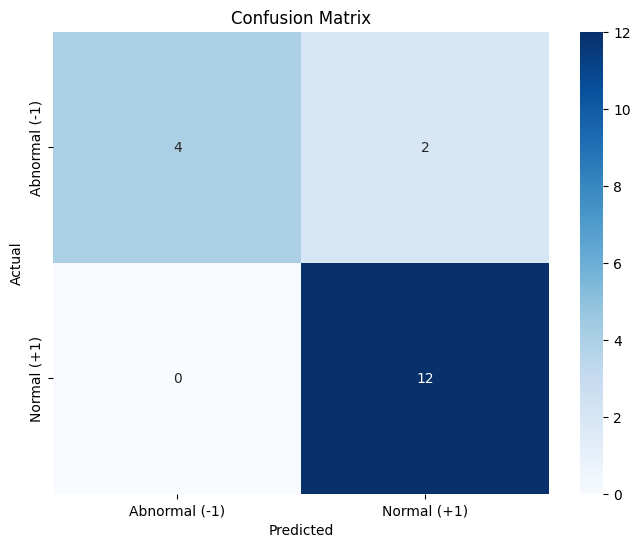

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib  # For saving model and scaler

# Step 1: Load the dataset
df = pd.read_excel('/content/IMF1.xlsx')

# Step 2: Prepare features (X) and labels (y)
X = df.drop('Label', axis=1)  # All features
y = df['Label']               # Target labels

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)  # Default RandomForestClassifier
rf_model.fit(X_train_scaled, y_train)

# Save the model and scaler for later use
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal (-1)', 'Normal (+1)'], yticklabels=['Abnormal (-1)', 'Normal (+1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
signal = loadmat(f'/content/novag10.mat')
emd = EMD()
signal = signal['data'].flatten()
imf = emd(signal)
imf_subset = imf[:6]
features = extract_features_from_signal(imf)
mean1 = features[0][0]
variance1 = features[0][1]
skewness1 = features[0][2]
kurtosis1 = features[0][3]
energy1 = features[0][4]
entropy1 = features[0][5]
dominant_freq1 = features[0][6]
total_power1 = features[0][7]

data = [mean1, variance1, skewness1, kurtosis1, energy1, entropy1, dominant_freq1, total_power1]

import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # To load the saved model
import os  # Import the os module
import pandas as pd # Import pandas to work with DataFrames

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Load the trained model and the scaler
model_path = os.path.join(current_directory, 'random_forest_model.joblib')
scaler_path = os.path.join(current_directory, 'scaler.joblib')

try:
    rf_model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
except FileNotFoundError:
    print("Model or scaler not found. Please check the file paths.")

# Convert data1 to a pandas DataFrame if it's a dictionary
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Example input: replace `input_signal` with the feature array of the signal you want to test
# Ensure the input is a numpy array and has shape (1, n_features)
input_signal = np.array(data).reshape(1, -1)  # Adjust data1[3] to your specific feature array

# Scale the features using the saved scaler
input_signal_scaled = scaler.transform(input_signal)

# Perform prediction
prediction = rf_model.predict(input_signal_scaled)

# Output the result
result = "Normal" if prediction == 1 else "Abnormal"
print("Signal Classification Prediction:", result)

Current working directory: /content
Signal Classification Prediction: Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # To load the saved model
import os  # Import the os module
import pandas as pd # Import pandas to work with DataFrames

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Load the trained model and the scaler
model_path = os.path.join(current_directory, 'random_forest_model.joblib')
scaler_path = os.path.join(current_directory, 'scaler.joblib')

try:
    rf_model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
except FileNotFoundError:
    print("Model or scaler not found. Please check the file paths.")

# Convert data1 to a pandas DataFrame if it's a dictionary
if isinstance(data1, dict):
    data1 = pd.DataFrame(data1)

# Example input: replace `input_signal` with the feature array of the signal you want to test
# Ensure the input is a numpy array and has shape (1, n_features)
input_signal = np.array(data1.iloc[55]).reshape(1, -1)  # Adjust data1[3] to your specific feature array

# Scale the features using the saved scaler
input_signal_scaled = scaler.transform(input_signal)

# Perform prediction
prediction = rf_model.predict(input_signal_scaled)

# Output the result
result = "Normal" if prediction == 1 else "Abnormal"
print("Signal Classification Prediction:", result)

Current working directory: /content
Signal Classification Prediction: Abnormal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
